<a href="https://colab.research.google.com/github/jeremidaneau/426demo/blob/master/jeremi_chatbot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2>Libraries import</h2>
Main libraries that are used are tensorflow2, keras , numpy and pandas

In [ ]:
#importing the libraries
import tensorflow as tf
import numpy as np
import pandas as pd
import json
import nltk
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Input, Embedding, LSTM , Dense,GlobalMaxPooling1D,Flatten
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

<h2> Retrieve Data (main_intent) </h2>

The data of bot is stored in a json file, which can be imported and used as a pandas dataframe.


In [ ]:
#importing the dataset from my github

data1 = pd.read_json("https://raw.githubusercontent.com/jeremidaneau/426demo/master/main_intent.json")

In [ ]:
#Put data into lists
tags = []
inputs = []
responses={}
for intent in data1['intents']:
  responses[intent['tag']] = intent['responses']
  for lines in intent['input']:
    inputs.append(lines)
    tags.append(intent['tag'])

In [ ]:
#converting to dataframe
data_ = pd.DataFrame({"inputs":inputs,
                     "tags":tags})

In [ ]:
#printing the data
data_

,inputs,tags
0,hello,greeting
1,hi there,greeting
2,nice to meet you,greeting
3,"hi, is this is the Jeremi's thought organization",greeting
4,any wisdom here ?,greeting
...,...,...
93,tell me more about your experience,Experience
94,give more details about your prokects,Experience
95,What are the requirements,Experience
96,what's the basic requirements,Experience


In [ ]:
data_ = data_.sample(frac=1)
print(data_)

                                              inputs         tags
47                                    what are you ?    whoareyou
10                                       hello there     greeting
3   hi, is this is the Jeremi's thought organization     greeting
59                            where do you live in ?  whereareyou
74                            steps to join the club         join
..                                               ...          ...
91                                                cv   Experience
55                              where are you from ?  whereareyou
58                                   where are you ?  whereareyou
8                                           hi there     greeting
20                                          okay bye      goodbye

[98 rows x 2 columns]


<h2> Pre-Processing </h2>

Pre-processing such as converting to lowercase ,removing the punctuations andencoding the textual data to numerical data are done

In [ ]:
#removing punctuations
import string
data_['inputs'] = data_['inputs'].apply(lambda wrd:[ltrs.lower() for ltrs in wrd if ltrs not in string.punctuation])
data_['inputs'] = data_['inputs'].apply(lambda wrd: ''.join(wrd))
data_

,inputs,tags
47,what are you,whoareyou
10,hello there,greeting
3,hi is this is the jeremis thought organization,greeting
59,where do you live in,whereareyou
74,steps to join the club,join
...,...,...
91,cv,Experience
55,where are you from,whereareyou
58,where are you,whereareyou
8,hi there,greeting


In [ ]:
#tokenize the data
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=200)
tokenizer.fit_on_texts(data_['inputs'])
train = tokenizer.texts_to_sequences(data_['inputs'])
#apply padding
from tensorflow.keras.preprocessing.sequence import pad_sequences
x_train = pad_sequences(train)

#encoding the outputs
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(data_['tags'])
y_train

array([8, 2, 2, 6, 4, 7, 5, 5, 6, 3, 1, 4, 2, 0, 8, 3, 2, 2, 6, 1, 2, 8,
       0, 1, 8, 8, 4, 1, 6, 0, 2, 0, 0, 7, 2, 1, 4, 1, 1, 3, 6, 5, 3, 1,
       6, 5, 1, 5, 3, 7, 8, 8, 1, 6, 6, 8, 8, 8, 2, 2, 0, 4, 4, 7, 5, 2,
       2, 4, 7, 8, 1, 4, 4, 5, 8, 3, 8, 2, 3, 1, 8, 4, 8, 8, 3, 5, 5, 0,
       1, 8, 1, 0, 1, 0, 6, 6, 2, 1])

Tensorflow's tokenizer assigns a unique token to each distinct word. and padding is done to get all the data to the same length so as to send it to an rnn layer

In [ ]:
input_shape = x_train.shape[1]
print(input_shape)

8


In [ ]:
#define vocabulary
vocabulary = len(tokenizer.word_index)
print("number of unique words : ",vocabulary)
output_length = le.classes_.shape[0]
print("output length: ",output_length)

number of unique words :  101
output length:  9


In [ ]:
#creating the model

i = Input(shape=(input_shape,))
x = Embedding(vocabulary+1,10)(i) #layer
x = LSTM(10,return_sequences=True)(x)#layer
x = Flatten()(x)
x = Dense(output_length,activation="softmax")(x)#layer
model  = Model(i,x)

<h2>Neural Network</h2>



In [ ]:
#compiling the model
model.compile(loss="sparse_categorical_crossentropy",optimizer='adam',metrics=['accuracy'])

In [ ]:
#training the model
train = model.fit(x_train,y_train,epochs=200)

Epoch 1/200
4/4 [==============================] - 2s 6ms/step - loss: 2.1992 - accuracy: 0.1429
Epoch 2/200
4/4 [==============================] - 0s 6ms/step - loss: 2.1949 - accuracy: 0.1939
Epoch 3/200
4/4 [==============================] - 0s 5ms/step - loss: 2.1913 - accuracy: 0.2551
Epoch 4/200
4/4 [==============================] - 0s 5ms/step - loss: 2.1881 - accuracy: 0.3163
Epoch 5/200
4/4 [==============================] - 0s 5ms/step - loss: 2.1850 - accuracy: 0.3163
Epoch 6/200
4/4 [==============================] - 0s 5ms/step - loss: 2.1818 - accuracy: 0.2959
Epoch 7/200
4/4 [==============================] - 0s 5ms/step - loss: 2.1782 - accuracy: 0.2857
Epoch 8/200
4/4 [==============================] - 0s 6ms/step - loss: 2.1745 - accuracy: 0.2959
Epoch 9/200
4/4 [==============================] - 0s 7ms/step - loss: 2.1705 - accuracy: 0.2959
Epoch 10/200
4/4 [==============================] - 0s 8ms/step - loss: 2.1660 - accuracy: 0.2653
Epoch 11/200
4/4 [===========

<h2> Model Analysis </h2>

The model has a perfect accuracy of 100%. 

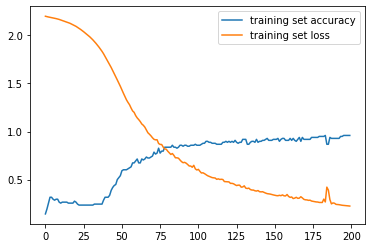

In [ ]:
#plotting model accuracy
plt.plot(train.history['accuracy'],label='training set accuracy')
plt.plot(train.history['loss'],label='training set loss')
plt.legend()
train

In [ ]:
#istory#chatting/
import random


while True:
  texts_p = []
  prediction_input = input('You : ')

  #removing punctuation and converting to lowercase
  prediction_input = [letters.lower() for letters in prediction_input if letters not in string.punctuation]
  prediction_input = ''.join(prediction_input)
  texts_p.append(prediction_input)

  #tokenizing and padding#
  prediction_input = tokenizer.texts_to_sequences(texts_p)
  prediction_input = np.array(prediction_input).reshape(-1)
  prediction_input = pad_sequences([prediction_input],input_shape)

  #getting output from model
  output = model.predict(prediction_input)
  output = output.argmax()

  #finding the right tag and predicting
  response_tag = le.inverse_transform([output])[0]
  print("Bot: ",random.choice(responses[response_tag]))
  if response_tag == "goodbye":
    break

You : Hello
Bot:  Ha , Glad you showed up. How are you ?
You : fine
Bot:  Hi random person, what do'ya want ?
You : I want a place
Bot:  You can call me brany and I am here to Help you
You : Where is the place
Bot:  Montréal
You : Nice
Bot:  Hello my friend, How can I help you ?


KeyboardInterrupt: ignored